In [12]:
pip install jupyter matplotlib seaborn wordcloud


^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# Cell 1: Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
sns.set_palette("husl")

# Load the processed dataset
df = pd.read_csv('../data/processed/legal_documents_sample.csv')

print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nDataset Info:")
print(df.info())
print(f"\nFirst few rows:")
df.head()


=== DATASET OVERVIEW ===
Dataset shape: (510, 4)
Columns: ['filepath', 'text', 'label', 'filename']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  510 non-null    object
 1   text      510 non-null    object
 2   label     510 non-null    object
 3   filename  510 non-null    object
dtypes: object(4)
memory usage: 16.1+ KB
None

First few rows:


,filepath,text,label,filename
0,C:\Users\Lenovo\Downloads\CUAD_v11\CUAD_v1\ful...,"Exhibit 10.33\n \nLast Updated: April 6, 2007\...",Affiliate_Agreements,CreditcardscomInc_20070810_S-1_EX-10.33_362297...
1,C:\Users\Lenovo\Downloads\CUAD_v11\CUAD_v1\ful...,Exhibit 10.27\nMARKETING AFFILIATE AGREEMENT\n...,Affiliate_Agreements,CybergyHoldingsInc_20140520_10-Q_EX-10.27_8605...
2,C:\Users\Lenovo\Downloads\CUAD_v11\CUAD_v1\ful...,DIGITAL CINEMA DESTINATIONS CORP. NETWORK AF...,Affiliate_Agreements,DigitalCinemaDestinationsCorp_20111220_S-1_EX-...
3,C:\Users\Lenovo\Downloads\CUAD_v11\CUAD_v1\ful...,EXHIBIT 10.1\n AFFLIATE AG...,Affiliate_Agreements,LinkPlusCorp_20050802_8-K_EX-10_3240252_EX-10_...
4,C:\Users\Lenovo\Downloads\CUAD_v11\CUAD_v1\ful...,Exhibit 10.8\nAffiliate Program / Premium Affi...,Affiliate_Agreements,SouthernStarEnergyInc_20051202_SB-2A_EX-9_8018...


In [14]:
# Cell 2: Basic dataset statistics
print("=== BASIC STATISTICS ===")
print(f"Total documents: {len(df)}")
print(f"Number of unique categories: {df['label'].nunique()}")
print(f"Categories: {df['label'].unique()}")
print(f"\nMissing values:")
print(df.isnull().sum())

# Text length statistics
df['text_length'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))

print(f"\nText Length Statistics:")
print(df['text_length'].describe())
print(f"\nWord Count Statistics:")
print(df['word_count'].describe())


=== BASIC STATISTICS ===
Total documents: 510
Number of unique categories: 28
Categories: ['Affiliate_Agreements' 'Co_Branding' 'Development' 'Distributor'
 'Endorsement' 'Franchise' 'Hosting' 'IP' 'Joint Venture'
 'License_Agreements' 'Maintenance' 'Manufacturing' 'Marketing'
 'Non_Compete_Non_Solicit' 'Outsourcing' 'Promotion' 'Reseller' 'Service'
 'Sponsorship' 'Strategic Alliance' 'Supply' 'Transportation'
 'Agency Agreements' 'Collaboration' 'Consulting Agreements'
 'Affiliate Agreement' 'Endorsement Agreement' 'Joint Venture _ Filing']

Missing values:
filepath    0
text        0
label       0
filename    0
dtype: int64

Text Length Statistics:
count       510.000000
mean      52393.788235
std       55750.578820
min         645.000000
25%       16323.000000
50%       33289.500000
75%       66266.000000
max      336730.000000
Name: text_length, dtype: float64

Word Count Statistics:
count      510.000000
mean      7844.303922
std       8363.172998
min        109.000000
25%       2

=== CLASS DISTRIBUTION ===
label
Maintenance                34
License_Agreements         33
Distributor                32
Strategic Alliance         32
Sponsorship                31
Development                29
Service                    28
Collaboration              26
Co_Branding                22
Hosting                    20
Outsourcing                18
Supply                     18
IP                         17
Manufacturing              17
Marketing                  17
Endorsement                15
Franchise                  15
Joint Venture _ Filing     14
Agency Agreements          13
Transportation             13
Promotion                  12
Reseller                   12
Consulting Agreements      11
Affiliate_Agreements        9
Joint Venture               9
Endorsement Agreement       9
Non_Compete_Non_Solicit     3
Affiliate Agreement         1
Name: count, dtype: int64


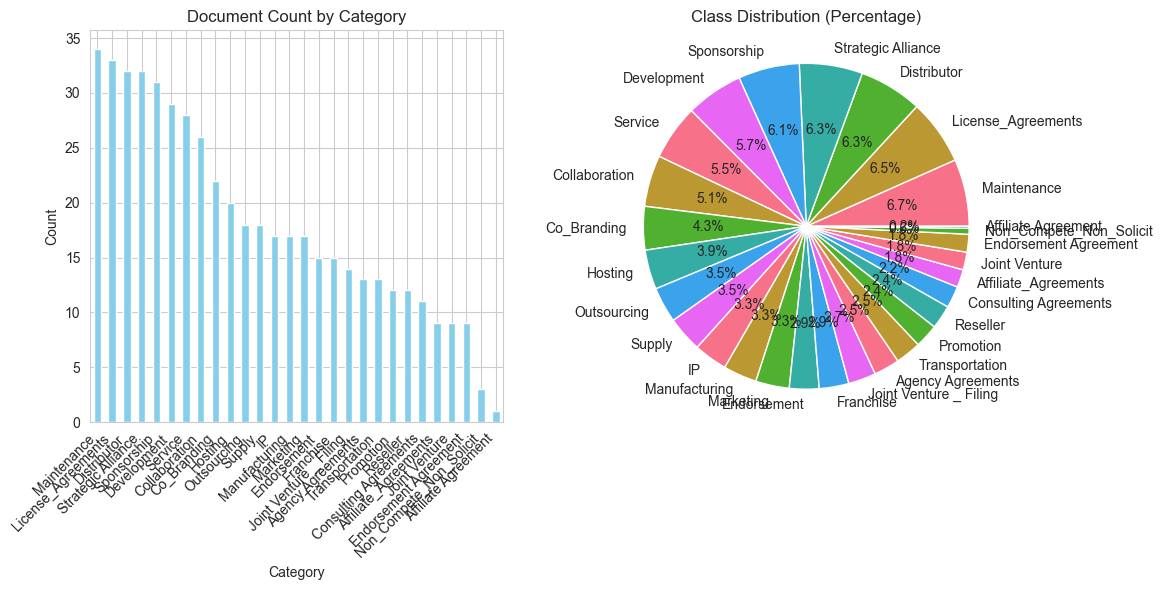


Class Imbalance Analysis:
Most frequent class: Maintenance (34 docs)
Least frequent class: Affiliate Agreement (1 docs)
Imbalance ratio: 34.00:1


In [15]:
# Cell 3: Class distribution analysis
print("=== CLASS DISTRIBUTION ===")
class_counts = df['label'].value_counts()
print(class_counts)

# Plot class distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color='skyblue')
plt.title('Document Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution (Percentage)')
plt.axis('equal')

plt.tight_layout()
plt.show()

# Check for class imbalance
print(f"\nClass Imbalance Analysis:")
print(f"Most frequent class: {class_counts.index[0]} ({class_counts.iloc[0]} docs)")
print(f"Least frequent class: {class_counts.index[-1]} ({class_counts.iloc[-1]} docs)")
print(f"Imbalance ratio: {class_counts.iloc[0] / class_counts.iloc[-1]:.2f}:1")


=== TEXT LENGTH ANALYSIS BY CATEGORY ===


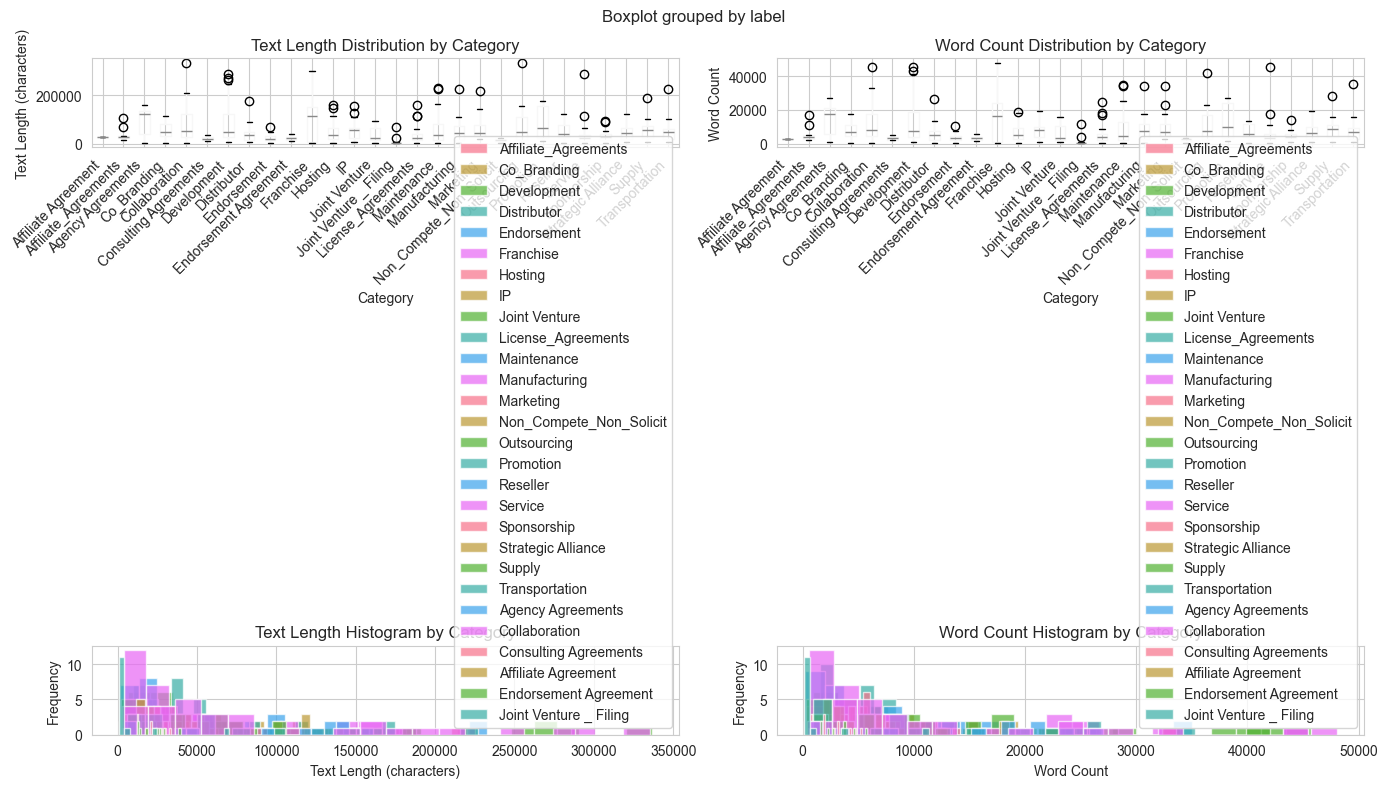


Text Length by Category:
                         count           mean           std      min  \
label                                                                  
Affiliate Agreement        1.0   26891.000000           NaN  26891.0   
Affiliate_Agreements       9.0   38455.555556  30659.293441  14027.0   
Agency Agreements         13.0   91316.076923  57333.844989   3879.0   
Co_Branding               22.0   51922.500000  33967.844577    846.0   
Collaboration             26.0   81507.230769  79282.748216   2772.0   
Consulting Agreements     11.0   21259.000000   7297.279973  11990.0   
Development               29.0   87545.620690  87656.624773   6344.0   
Distributor               32.0   39544.750000  33198.195595   4546.0   
Endorsement               15.0   23597.133333  17111.345025   3457.0   
Endorsement Agreement      9.0   22288.777778   9113.955039  11890.0   
Franchise                 15.0  103565.933333  95495.282379   2965.0   
Hosting                   20.0   49581

In [17]:
# Cell 4: Text length analysis by category
print("=== TEXT LENGTH ANALYSIS BY CATEGORY ===")

# Text length distribution by category
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
df.boxplot(column='text_length', by='label', ax=plt.gca())
plt.title('Text Length Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Text Length (characters)')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
df.boxplot(column='word_count', by='label', ax=plt.gca())
plt.title('Word Count Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.hist(subset['text_length'], alpha=0.7, label=label, bins=20)
plt.title('Text Length Histogram by Category')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 4)
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.hist(subset['word_count'], alpha=0.7, label=label, bins=20)
plt.title('Word Count Histogram by Category')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Statistical summary by category
print("\nText Length by Category:")
print(df.groupby('label')['text_length'].describe())
print("\nWord Count by Category:")
print(df.groupby('label')['word_count'].describe())


In [18]:
# Cell 5: Text preprocessing for word frequency analysis
import string
from collections import defaultdict

def clean_text_for_analysis(text):
    """Clean text for word frequency analysis"""
    if pd.isna(text):
        return ""
    # Convert to lowercase
    text = str(text).lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Apply text cleaning
df['cleaned_text'] = df['text'].apply(clean_text_for_analysis)

# Common stop words for legal documents
legal_stopwords = {'the', 'and', 'or', 'of', 'to', 'in', 'for', 'with', 'by', 'on', 'at', 
                   'from', 'as', 'be', 'is', 'are', 'was', 'were', 'will', 'shall', 'may',
                   'this', 'that', 'such', 'any', 'all', 'each', 'said', 'hereby', 'therein',
                   'thereof', 'party', 'parties', 'agreement', 'contract', 'section', 'clause'}

def get_word_frequency(text_series, stopwords=None, top_n=20):
    """Get word frequency from text series"""
    if stopwords is None:
        stopwords = set()
    
    word_freq = Counter()
    for text in text_series:
        if pd.notna(text):
            words = text.split()
            for word in words:
                if len(word) > 2 and word not in stopwords:
                    word_freq[word] += 1
    
    return word_freq.most_common(top_n)

print("=== WORD FREQUENCY ANALYSIS ===")
overall_freq = get_word_frequency(df['cleaned_text'], legal_stopwords, 30)
print("Top 30 words across all documents:")
for word, freq in overall_freq[:10]:
    print(f"{word}: {freq}")


=== WORD FREQUENCY ANALYSIS ===
Top 30 words across all documents:
other: 26181
not: 21077
its: 19663
under: 14076
which: 13131
company: 12555
have: 11166
information: 10875
product: 10863
date: 10134


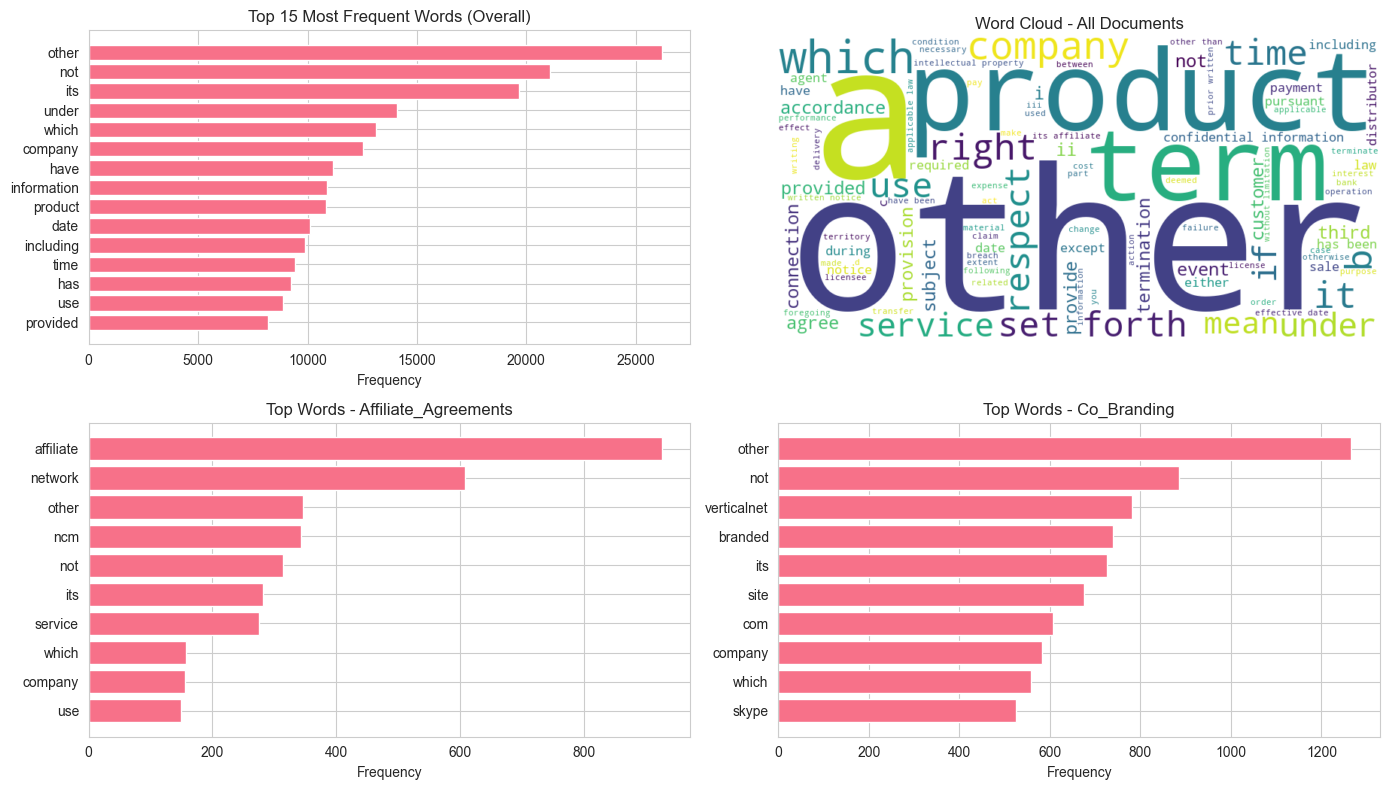

In [19]:
# Cell 6: Word frequency visualization and word clouds
# Plot overall word frequency
words, frequencies = zip(*overall_freq)
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.barh(words[:15][::-1], frequencies[:15][::-1])
plt.title('Top 15 Most Frequent Words (Overall)')
plt.xlabel('Frequency')

# Word cloud for overall text
all_text = ' '.join(df['cleaned_text'].dropna())
if all_text:
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                         stopwords=legal_stopwords, max_words=100).generate(all_text)
    
    plt.subplot(2, 2, 2)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - All Documents')

# Word frequency by category (sample)
categories = df['label'].unique()[:2]  # Show first 2 categories
for i, category in enumerate(categories):
    category_text = df[df['label'] == category]['cleaned_text']
    category_freq = get_word_frequency(category_text, legal_stopwords, 10)
    
    if category_freq:
        words, frequencies = zip(*category_freq)
        plt.subplot(2, 2, 3+i)
        plt.barh(words[::-1], frequencies[::-1])
        plt.title(f'Top Words - {category}')
        plt.xlabel('Frequency')

plt.tight_layout()
plt.show()


In [20]:
# Cell 7: Data quality assessment
print("=== DATA QUALITY ASSESSMENT ===")

# Check for very short or empty documents
short_docs = df[df['word_count'] < 50]
print(f"Documents with < 50 words: {len(short_docs)}")
if len(short_docs) > 0:
    print("Short documents by category:")
    print(short_docs['label'].value_counts())

# Check for very long documents (potential OCR errors)
long_docs = df[df['word_count'] > 10000]
print(f"\nDocuments with > 10,000 words: {len(long_docs)}")
if len(long_docs) > 0:
    print("Long documents by category:")
    print(long_docs['label'].value_counts())

# Check for potential duplicates
print(f"\nPotential duplicate check:")
print(f"Unique text entries: {df['text'].nunique()}")
print(f"Total entries: {len(df)}")
if df['text'].nunique() < len(df):
    print("⚠️  Potential duplicates found!")
    
# Sample text lengths by category
print(f"\nSample documents per category:")
for category in df['label'].unique():
    sample = df[df['label'] == category].iloc[0]
    print(f"\n{category}:")
    print(f"  - Filename: {sample['filename']}")
    print(f"  - Word count: {sample['word_count']}")
    print(f"  - First 200 characters: {sample['text'][:200]}...")


=== DATA QUALITY ASSESSMENT ===
Documents with < 50 words: 0

Documents with > 10,000 words: 131
Long documents by category:
label
Development               12
Maintenance               11
Collaboration             10
Franchise                  9
Outsourcing                8
Strategic Alliance         8
Agency Agreements          8
Supply                     7
Promotion                  6
Co_Branding                6
Marketing                  6
IP                         5
Manufacturing              5
Reseller                   5
Distributor                4
Hosting                    4
Service                    3
Transportation             3
Joint Venture              3
License_Agreements         3
Affiliate_Agreements       2
Endorsement                1
Joint Venture _ Filing     1
Sponsorship                1
Name: count, dtype: int64

Potential duplicate check:
Unique text entries: 509
Total entries: 510
⚠️  Potential duplicates found!

Sample documents per category:

Affiliate_

In [21]:
# Cell 8: Summary and recommendations
print("=== EDA SUMMARY & RECOMMENDATIONS ===")

print(f"📊 Dataset Overview:")
print(f"   • Total documents: {len(df)}")
print(f"   • Categories: {df['label'].nunique()}")
print(f"   • Average words per document: {df['word_count'].mean():.0f}")

print(f"\n🎯 Classification Challenges:")
# Class imbalance
max_class_count = df['label'].value_counts().iloc[0]
min_class_count = df['label'].value_counts().iloc[-1]
imbalance_ratio = max_class_count / min_class_count

if imbalance_ratio > 3:
    print(f"   • ⚠️  Class imbalance detected (ratio: {imbalance_ratio:.1f}:1)")
    print(f"   • Consider: SMOTE, class weights, or data augmentation")
else:
    print(f"   • ✅ Balanced dataset (ratio: {imbalance_ratio:.1f}:1)")

# Text length variation
length_cv = df['word_count'].std() / df['word_count'].mean()
if length_cv > 1:
    print(f"   • ⚠️  High text length variation (CV: {length_cv:.2f})")
    print(f"   • Consider: Text truncation/padding or chunk-based classification")
else:
    print(f"   • ✅ Consistent text lengths (CV: {length_cv:.2f})")

print(f"\n🚀 Next Steps for Model Building:")
print(f"   1. Text Preprocessing: Clean and normalize text")
print(f"   2. Feature Engineering: TF-IDF, embeddings, or BERT features")
print(f"   3. Model Selection: Start with simple models (SVM, Random Forest)")
print(f"   4. Advanced Models: Fine-tune BERT/Legal-BERT for higher accuracy")
print(f"   5. Evaluation: Use stratified cross-validation")

print(f"\n💡 For High Accuracy:")
print(f"   • Use domain-specific embeddings (Legal-BERT)")
print(f"   • Implement ensemble methods")
print(f"   • Consider hierarchical classification")
print(f"   • Use cross-validation for robust evaluation")


=== EDA SUMMARY & RECOMMENDATIONS ===
📊 Dataset Overview:
   • Total documents: 510
   • Categories: 28
   • Average words per document: 7844

🎯 Classification Challenges:
   • ⚠️  Class imbalance detected (ratio: 34.0:1)
   • Consider: SMOTE, class weights, or data augmentation
   • ⚠️  High text length variation (CV: 1.07)
   • Consider: Text truncation/padding or chunk-based classification

🚀 Next Steps for Model Building:
   1. Text Preprocessing: Clean and normalize text
   2. Feature Engineering: TF-IDF, embeddings, or BERT features
   3. Model Selection: Start with simple models (SVM, Random Forest)
   4. Advanced Models: Fine-tune BERT/Legal-BERT for higher accuracy
   5. Evaluation: Use stratified cross-validation

💡 For High Accuracy:
   • Use domain-specific embeddings (Legal-BERT)
   • Implement ensemble methods
   • Consider hierarchical classification
   • Use cross-validation for robust evaluation
